# Architecture and Use Cases

## How is CloudWatch used to provide observability for applications?

There are many ways to observe your application, and your choices will be determined by what is important for you, your users, and your business. To illustrate some of the ways observability can help, consider two examples. In both examples, you will review the problem to be solved, the required data, and how to analyze and act on that data.

The first example focuses on the user's experience, or an outside-in approach. The second example looks at scaling infrastructure to maintain application availability, or an inside-out approach.

## Outside-in approach

The first example is a web application, but the application architecture is not important here. No matter how the infrastructure is performing, the focus is on the impact to the user experience. You will explore some of the CloudWatch capabilities to help us understand and improve the end-user digital experience. 



### Step 1

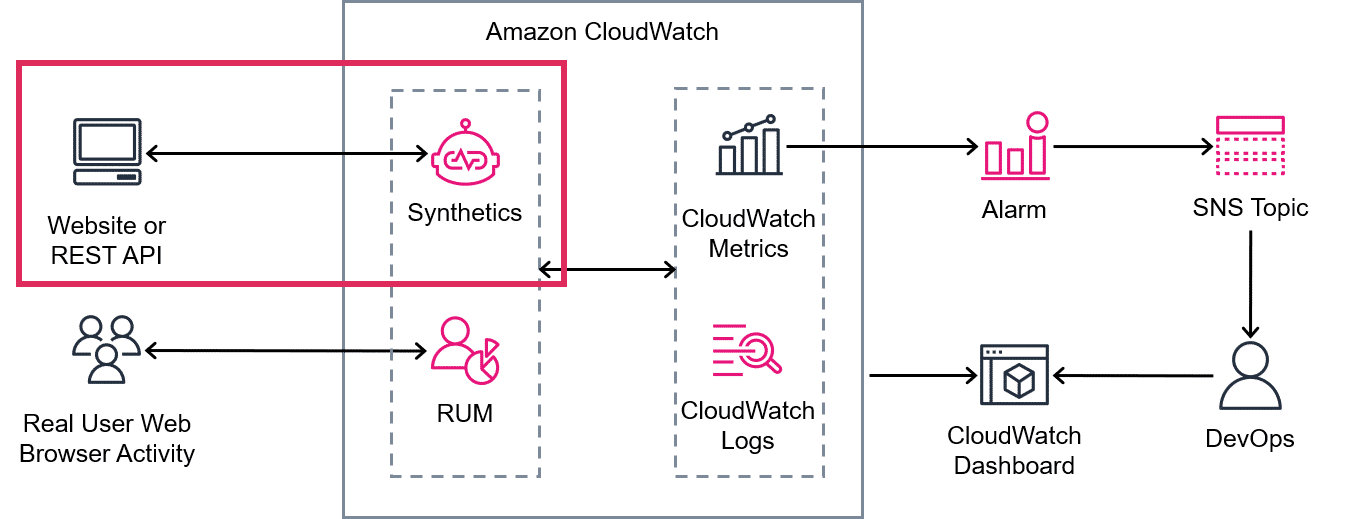

**CloudWatch Synthetics**

To understand the health and latency of key pages in the web application, you can use the CloudWatch Synthetics feature. With CloudWatch Synthetics, you create a canary that contains instructions about what actions should be performed in the application. The canary carries out these tests in the same manner as a real user would interact with the application.

You can check a single page, or combine multiple pages and actions. For example, you might want to check the availability of the main page. For an ecommerce application, you can create a canary to go through the process of searching for a product, adding it to the shopping cart, and purchasing that item. You can schedule these canaries so you can immediately detect any changes in behavior, even if there are no users on the application.

You can also use the data from the canaries to collect page load errors and broken user workflows for the web applications or APIs.

### Step 2

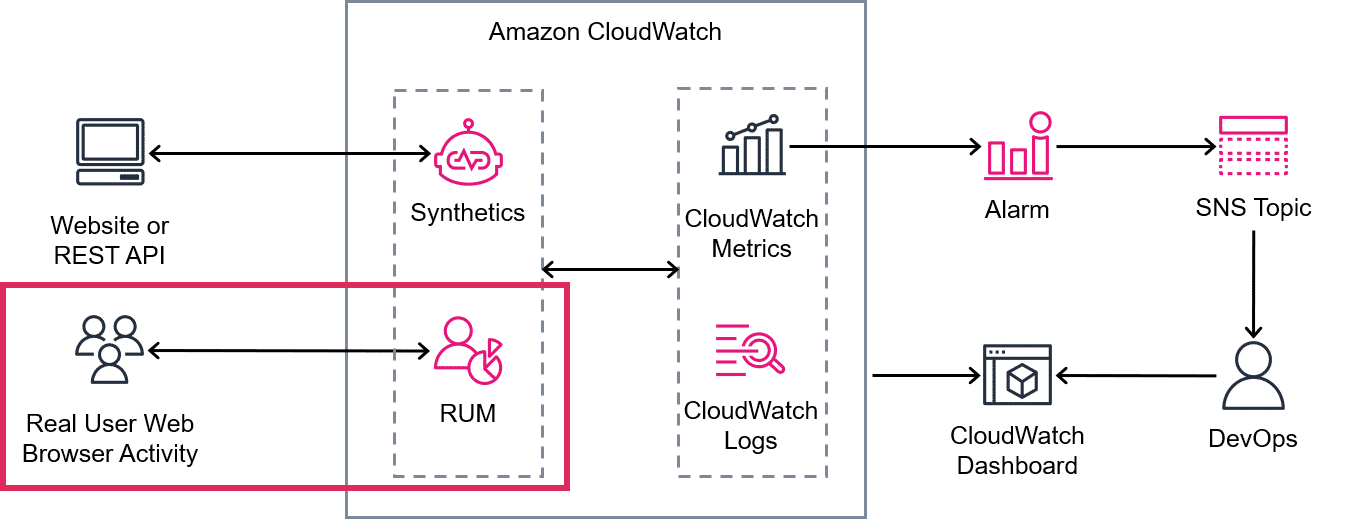

**CloudWatch RUM**
You can also go beyond the synthetic tests to understand the real experience of users in the application. For example, you might want to know whether the browser a customer is using gives a different experience or if users in a certain part of the world are getting a much slower experience.

You can use CloudWatch RUM to collect data from the user’s web client to get insights into the user’s experience. Like Synthetics, you can collect latency and page error data, but this time from real users rather than synthetic tests. In addition, you can explore data on location, device type, and browser to visualize themes and trends. This data can help you to identify and debug client-side performance bottlenecks.

### Step 3

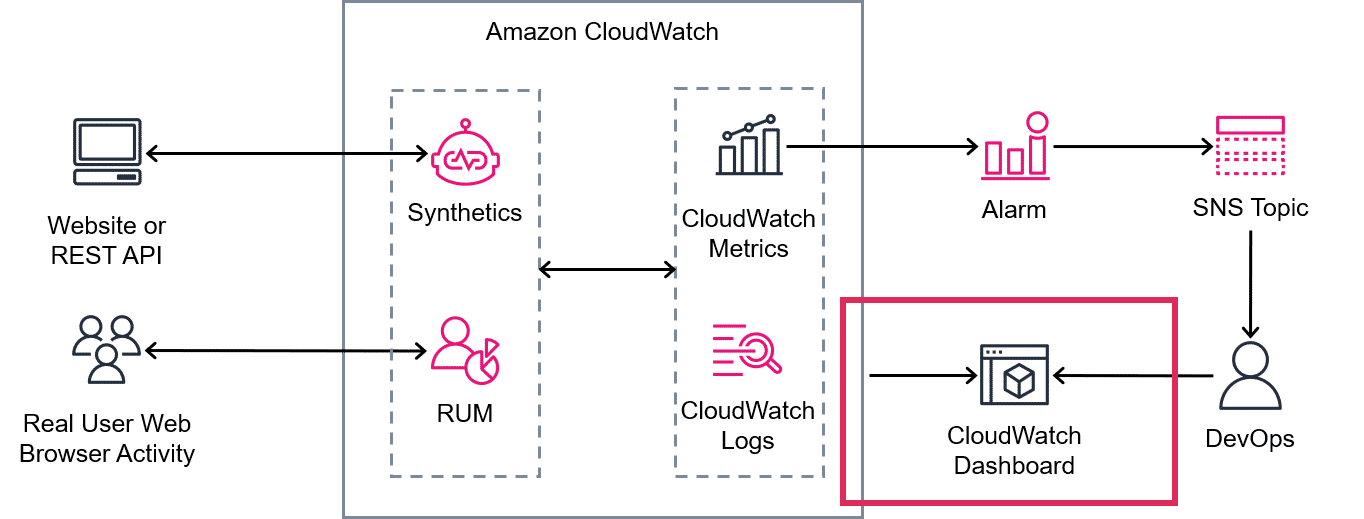

CloudWatch dashboard

The console experience for Synthetics and RUM has a lot of visualizations to use out of the box. However, if you want to see relevant parts of this data together and do a deeper dive, you can create a user-focused CloudWatch dashboard precisely for this application. The querying tools in CloudWatch help you search, aggregate, and visualize data. You can view logs and metrics together for troubleshooting, or use the time controls on the dashboard to view current and historic data.

### Step 4

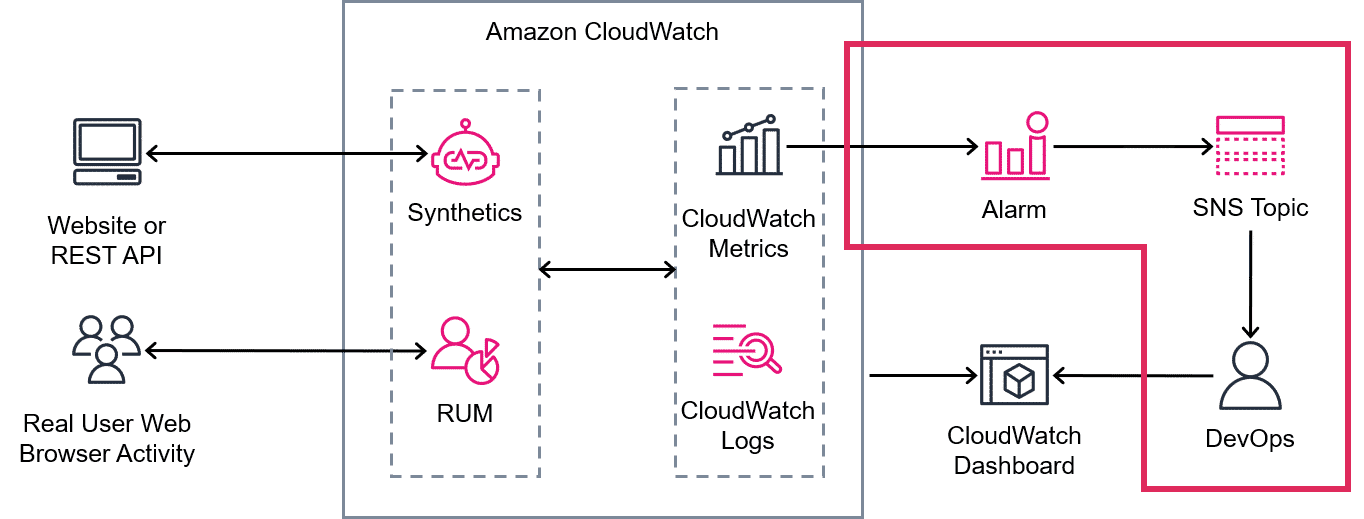

Notifications

Finally, you want to know when the user experience does not meet your expectations. With defined thresholds for page latency for key pages in an application, you want to know immediately when these are breached. Then, you can investigate and resolve any issues.

You can set CloudWatch alarms to notify you by email through Amazon Simple Notification Service (Amazon SNS) when these thresholds are breached. If you notice specific errors impacting your users, you can set additional alarms to notify you when these occur. This data can be added to the CloudWatch dashboard.

## Inside-out approach

In this second example, you will explore how CloudWatch can maintain application availability by scaling the infrastructure to meet application demands.

For example, consider an e-Commerce application hosted on Amazon Elastic Compute Cloud (Amazon EC2) instances behind an Elastic Load Balancing (ELB). The load balancer helps to distribute load across the EC2 instances. Traffic varies based on the time of day and can increase dramatically when there is a sale. You want to make sure that the application can handle the load caused by increased traffic, without paying for this high capacity all the time. During such cases, you can automatically scale out the Amazon EC2 resources.

### Step 1

CPU utilization

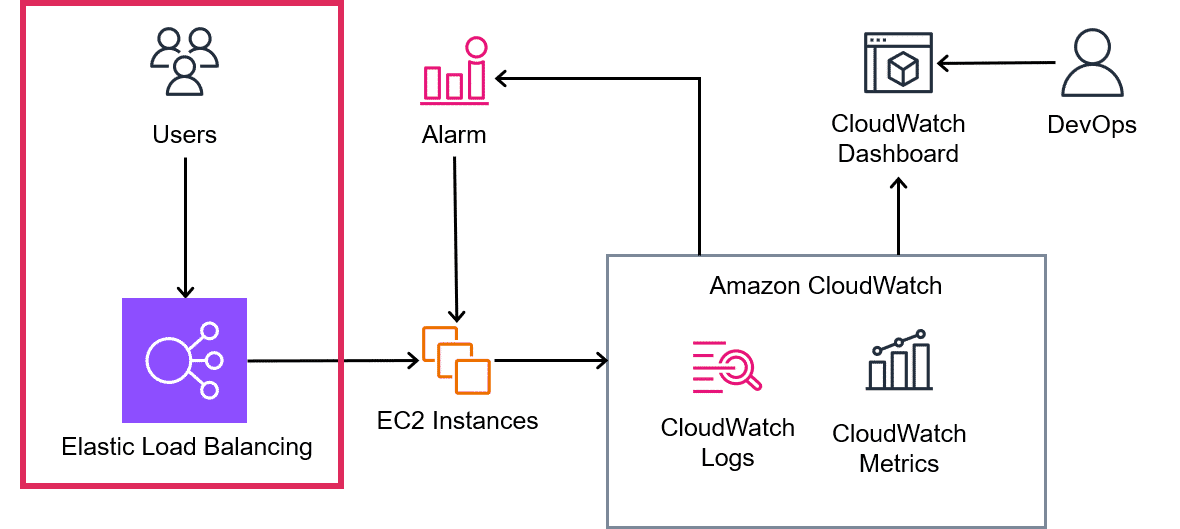

You want to understand the load on your servers. In this example, this means understanding the CPU utilization for users connecting through Elastic Load Balancing. CPUUtilization is a default (vended) metric that is available for EC2 instances in CloudWatch.

You can view this metric any time from the CloudWatch console, or from the Amazon EC2 console where there is a monitoring tab available for each EC2 instance.

### Step 2

CloudWatch alarms

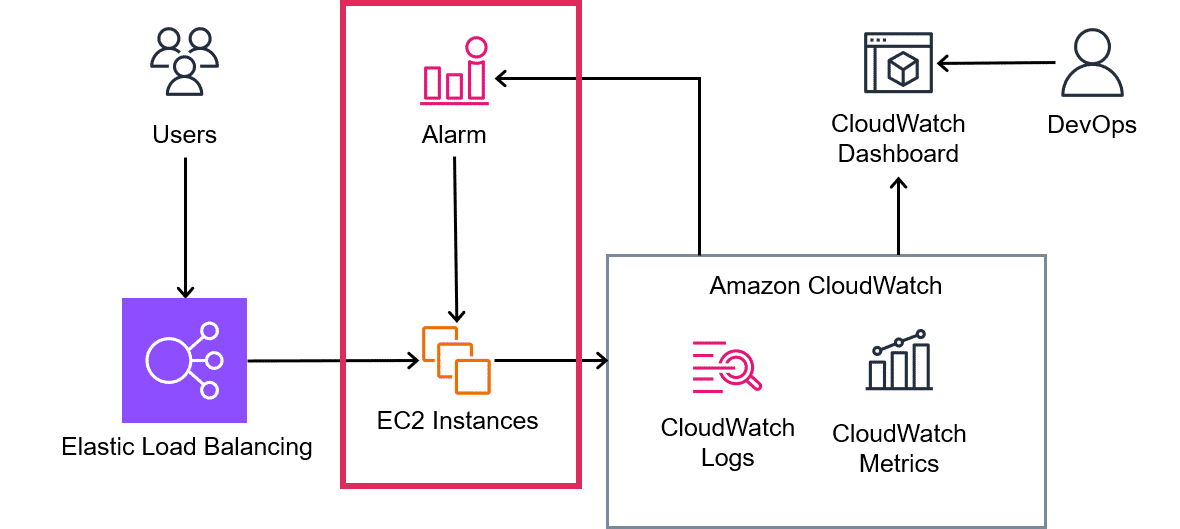

When the CPU utilization is too high, the application becomes slow for users. You want to be able to add more Amazon EC2 resources when your existing servers reach this threshold.

You can do this using CloudWatch alarms. When you create an alarm, you can set a threshold and then take action when this threshold is met.

In this case, the action is to add more resources through Amazon EC2 Auto Scaling.

### Step 3

CloudWatch dashboard

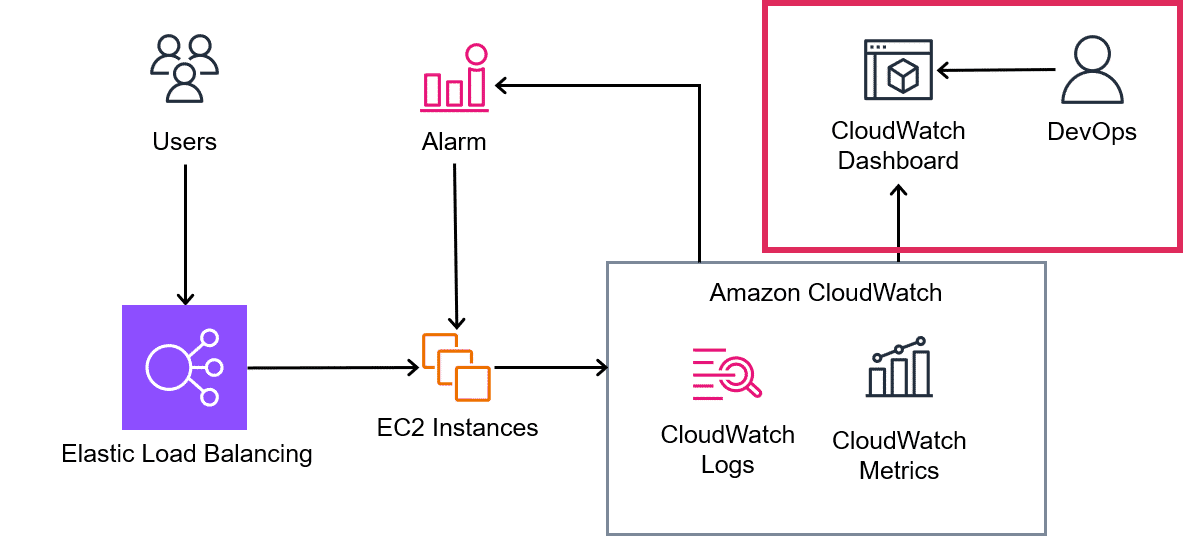

You also want to see if these infrastructure changes have the desired improvement for your users. In the application, web server logs record page load times. 

You can ingest the log data from the web server into CloudWatch Logs, and extract and visualize the data on page response times. You can visualize this data, along with the CPU utilization, on a CloudWatch dashboard to validate the impact of your actions.

These are two different ways in which CloudWatch features can be used to understand your workflows. There are many such use cases that CloudWatch features can support.

## What are the basic technical concepts of CloudWatch?

The concepts described below are the basic definitions in CloudWatch in the areas of collecting, analyzing, and acting on your data.

### Metrics
A metric is a time-ordered series of numerical data, such as CPU usage of an EC2 instance. You can use metrics to store all kinds of data, including infrastructure, application, or customer satisfaction data.



Metrics are uniquely defined by a namespace, metric name, and zero or more dimensions. Namespaces provide a container for you to store related data together. Metrics provided by AWS services have a namespace that starts with AWS, such as AWS/EC2. 



Dimensions are name/value pairs that you can use to add context to your metric data, such as the instance ID of an EC2 instance. Dimensions can also be used to search and filter your metric data for dashboards or alarms.



Many AWS services publish metrics to CloudWatch by default. You can also create your own custom metrics. With the CloudWatch agent, you can ingest additional metrics from EC2 instances, on premises, and other cloud-based servers. 



To learn more, see Collect metrics, logs, and traces from Amazon EC2 instances and  on-premises servers with the CloudWatch agent(opens in a new tab) in the Amazon CloudWatch user guide. 


### Logs
Logs are a series of messages sent by an application or service. They can contain more in-depth and contextualized data than metrics, and can be useful for a deeper dive into the situation. The log message content can be anything that is text based but often has a structure format like JSON or is space separated. 



When logs are ingested from servers, the logs are written to a file and ingested into CloudWatch using the CloudWatch agent. Some AWS services have native integration with CloudWatch logs, such as AWS Lambda functions, AWS CloudTrail, or VPC Flow Logs. You can extract data from your logs and create metrics using metric filters. 



To learn more, see Creating metrics from log events using filters(opens in a new tab) in the Amazon CloudWatch user guide.


### Traces
A trace collects data generated by a single request. That request is typically an HTTP GET or POST request that travels through a load balancer, hits your application code, and generates downstream calls to other AWS services or external web APIs. Traces are the fundamental data type of AWS X-Ray, which can be used with logs and metric data from CloudWatch.



To learn more, see the AWS X-Ray product page(opens in a new tab).


### Synthetics and canaries
You use CloudWatch Synthetics to create canaries. Canaries help you to monitor URLs, REST APIs, and website content. Canaries are configurable scripts that follow the same routes and perform the same actions as a customer.



You can specify a schedule for your canary so you can continually verify your customer experience, even when there are no customers using your application.



To learn more, see Using synthetic monitoring(opens in a new tab) in the Amazon CloudWatch user guide.


### Metric Insights and Metric Math
You can search and aggregate your metric data using Metric Insights or Metric Math.

Metric Insights is an SQL-based query language that you can use to query your metrics at scale. Metric Math is usually used for querying a large amount of data over a short period of time (note the limits on Metric Insights). To learn more, see the Amazon CloudWatch Developer Guide(opens in a new tab).

Metric Math contains search and math functions to help you to query and analyze your data. Metric Math supports a variety of mathematical functions, such as MAX, MIN, AVG, or STDEV, to support your analysis. You can also include IF statements, arithmetic, comparison, and logical operators. You can use Metric Math to query over a longer period of time than Metric Insights. You can query the full history of your metrics data if you wish.

With both Metric Insights and Metric Math, you can add the results of your queries to a CloudWatch dashboard or create a CloudWatch alarm. CloudWatch alarms can only be created if the query returns a single time series.

To learn more, see Query your metrics with CloudWatch Metrics Insights(opens in a new tab) and Use metric math(opens in a new tab) in the Amazon CloudWatch user guide. 


### Logs Insights
You can search and aggregate your logs using Logs Insights query language. You can visualize the results of Logs Insights queries on a CloudWatch dashboard as a data table or using various chart types.



To learn more, see Analyzing log data with CloudWatch Logs Insights(opens in a new tab) in the Amazon CloudWatch user guide.


### Dashboards
CloudWatch dashboards help you to visualize data from your metrics and logs. You can create custom dashboards for different personas and applications, gathering related data about your application in a single place.



Dashboards are built from widgets, which you can configure, position, and resize on your dashboard as appropriate. Widgets are available for textual information, various table and chart displays for metrics and logs, and alarm status.


### Alarms
You can use alarms to take action when metric data hits a threshold. Thresholds can be static or based on anomaly detection models that detect unexpected behavior based on past data. You can specify actions to take when the alarm state changes (OK, ALARM, or INSUFFICIENT DATA). You can choose multiple actions, such as  sending a notification through Amazon SNS, EC2 action, Systems Manager action, Auto scaling action and ticket action.



A metric alarm is created from a single metric, or from a math expression based on metrics, as long as it results in a single time series.



A composite alarm contains a rule expression that you can use to logically combine the state of multiple alarms.



To learn more, see  Using Amazon CloudWatch alarms(opens in a new tab) and Combining alarms(opens in a new tab) in the Amazon CloudWatch user guide### .

## CloudWatch provides visibility into system-wide performance and allows users to set alarms, automatically react to changes, and gain a unified view of operational health.

## What are typical use cases for CloudWatch?

To learn more about CloudWatch use cases, expand the following five sections.


### Deliver a unified observability experience
Create an end-to-end observability experience for your workloads running on AWS, on premises, hybrid, or on other clouds.  Use CloudWatch to gather, collate, visualize, and alert on the data that matters most to you. Visualize data from across multiple accounts in a single location.


### Visualize data in context, at scale
CloudWatch helps you make sense of the explosion of data in modern applications, so you can make your data work for you and monitor the signals that directly impact your business. Create custom dashboards for different applications and roles in your organization. Then, you can quickly visualize and share what you care most about, such as service-level objectives (SLOs), key performance indicators (KPIs), user experience, application performance, or resource utilization.


### Support incident detection, resolution, and root cause analysis
Alert on known thresholds, or anomalous behavior, to spot problems before they impact users. Visualize the effect on end users to understand impact and priority. Analyze and correlate metrics, logs, and traces to understand and resolve the root cause of performance issues in your AWS resources. Act on known issues to activate automated resolution and reduce the need for manual intervention, eliminating user impact and in turn reducing MTTR.


### Improve end user experience
Expand your understanding of your workload performance with application performance monitoring (APM) and user experience data. Keep your users happy with reduced downtime and fast, seamless experiences by making data-driven decisions based on understanding bottlenecks and what impacts user experience. Gather and view performance metrics for key application functionality. Understand the impact on your user experience during events such as heavy traffic, changes to infrastructure, and code deployments. Use synthetic canaries, real-time user monitoring, and internet monitoring to gather baseline data and understand impacts before they affect your customer.


### Improve cost and resource optimization
Drive cost savings with visibility into your resource utilization. Combine this with user experience and application performance data to optimize resource usage and understand the impact on end users. Create actions to modify resource usage when thresholds are met to find the right balance for you between performance and cost.

## CloudWatch gives you actionable insights that help you optimize application performance, manage resource utilization, and understand system-wide operational health. 

## What else should you keep in mind about CloudWatch?

Observability is a big topic, with many different use cases and personas that it can support. Don't try and do it all at once. Focus on what matters to you.

To learn more, expand the following six sections.


### Identify success criteria
Start by taking some time to think about what matters to you, your teams, your company, and your users. What do you want to identify and improve on with observability? For example, do you want to improve on your time to resolve incidents? Or do you want to be able to proactively detect issues? Or perhaps your focus is on improving your users' experience with your application or better using your resources to support the application. Start with a small number of key areas, and identify your success criteria in these areas.


### Ingesting data
After you have identified what matters to you, focus on ingesting data to support this. Don't ingest everything you can because it will be harder to find the data you need and will cost more. With log data, filter out what doesn't matter to you, and set retention for your log data so you don't pay for it when it's no longer useful to you. With metric data, think about the frequency of the data and the metrics you need, which will affect your costs. Consider whether the data is better ingested as log or metric data.


### Agent deployment
Consider how you will manage agent deployments as your footprint increases to reduce manual effort. How do you want to control where the agent is installed? How will you update agent configurations? You can use AWS Systems Manager to support your deployments and configuration updates. You can store your CloudWatch agent configurations in Parameter store and create state associations to install and configure the CloudWatch agent. You can choose to schedule these actions, and use tags or resource groups to include new instances. You might prefer to include the CloudWatch agent in your Amazon Machine Image (AMI) or include this in the user data for your instance.


### Avoid alarm fatigue
Do not create so many alarms that people learn to ignore them. Set alarms where you have actions defined: This alarm will go to this team, and they will use it to kick off this process. It is usually better to start with fewer alarms, allow people to take the right actions, and see the benefits. Think about the importance of an alarm and its action. Not everything that can be identified is important enough to act on immediately. Link your alarms into your existing incident management process.



### Create context-rich dashboards
Alarms give you a point in time, but understanding the behavior over time can help you see patterns, which can be insightful. For example, the fast upward trend requires more immediate attention than the slow trend. The issues that occur every morning at 3 AM might have a cause that can be mitigated rather than acting every time. Include contextual information in your dashboard to describe what this data is about, how it should be used, and link to documentation and support teams.


### Personally identifiable information (PII)
Take care with log data, which may contain sensitive information. Remove or mask data from your log files before ingesting it into CloudWatch, or set data protection policies on your CloudWatch Log groups to capture and mask sensitive data.